In [58]:
import numpy as np
import time
from PIL import Image
import IPython.display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from utils import *

%matplotlib inline

#### Importing data

In [32]:
# Import January 2015 VIIRS data
t0 = time.time()
lights_fn = '/atlas/u/nj/viirs/2015/1/2/SVDNB_npp_20150101-20150131_75N060W_vcmcfg_v10_c201505111709.avg_rade9.tif'
counts_fn = '/atlas/u/nj/viirs/2015/1/2/SVDNB_npp_20150101-20150131_75N060W_vcmcfg_v10_c201505111709.cf_cvg.tif'
lights = Image.open(lights_fn, 'r')
t1 = time.time()
print 'Import lights image in {} seconds: {}'.format(t1-t0, lights.size)
counts = Image.open(counts_fn, 'r')
t2 = time.time()
print 'Import counts image in {} seconds: {}'.format(t2-t1, counts.size)

Import lights image in 0.190546035767 seconds: (28800, 18000)
Import counts image in 0.0748028755188 seconds: (28800, 18000)


In [33]:
# Convert to arrays
t0 = time.time()
lights = np.array(lights)
counts = np.array(counts)
t1 = time.time()
print 'Converted both to arrays: {} seconds'.format(t1-t0)
print '  Lights:', lights.shape
print '  Counts:', counts.shape

Converted both to arrays: 18.7399718761 seconds
  Lights: (18000, 28800)
  Counts: (18000, 28800)


In [34]:
# Print summary statistics
print 'Lights:'
print '  Max:', lights.max()
print '  Min:', lights.min()
print '  Mean:', lights.mean()
print '  Std:', lights.std()
print 'Counts:'
print '  Max:', counts.max()
print '  Min:', counts.min()
print '  Mean:', counts.mean()
print '  Std:', counts.std()

Lights:
  Max: 88684.5
  Min: -0.79578
  Mean: 0.593401
  Std: 15.7536
Counts:
  Max: 36
  Min: 0
  Mean: 9.6654761439
  Std: 4.86557204553


#### Restricting to part of Africa

In [48]:
# Defining pixel area
size = 400
tl_row = 6000
tl_col = 14000

In [49]:
# Getting area
lights_small = lights[tl_row:tl_row+size,tl_col:tl_col+size]
counts_small = counts[tl_row:tl_row+size,tl_col:tl_col+size]

In [54]:
# Converting back to image
out_fn = '../images/sample_nl.bmp'
lights_small_im = Image.fromarray(lights_small.astype(np.uint8))
lights_small_im.save(out_fn)

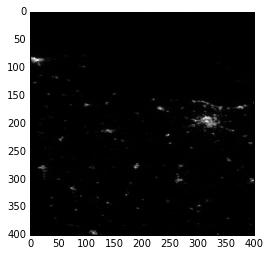

In [51]:
plt.imshow(lights_small, cmap=cm.Greys_r)

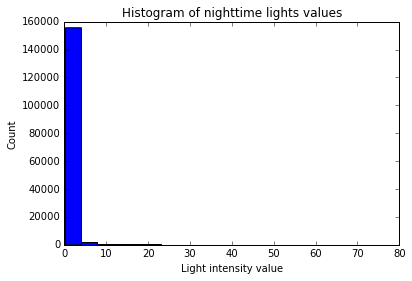

In [57]:
plt.figure()
plt.hist(lights_small.ravel(), bins=20)
plt.xlabel('Light intensity value')
plt.ylabel('Count')
plt.title('Histogram of nighttime lights values')
plt.show()

#### Get daytime image

In [61]:
lat = 0.255328
lon = 32.634225
zoom = 17
out_fn = '../images/sample_daytime.jpg'

In [62]:
sample_image(out_fn, lat, lon, zoom=zoom)

True